<a href="https://www.kaggle.com/code/vainero/breast-cancer-diagnosis-logistic-regression?scriptVersionId=104589440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1.1"></a>
<h1 style="background-color:#d8b2d5;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 10px 10px;">Introduction</h1>

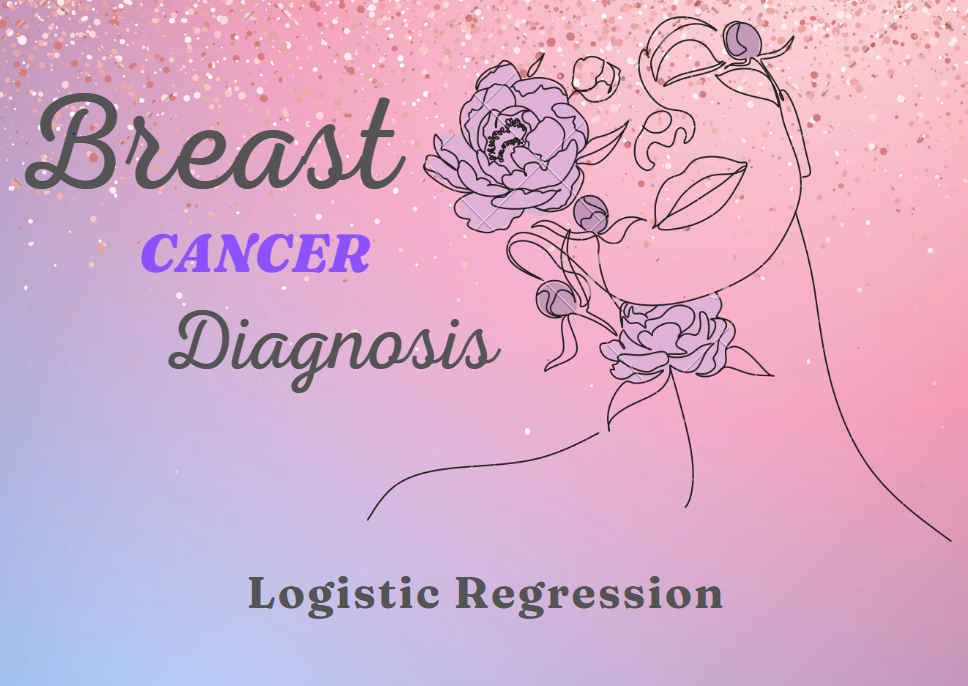

<p style="margin: 0cm 0cm 10pt; line-height: 115%; font-size: 15px; font-family: Calibri, sans-serif; text-align: center;"><span style='font-size: 24px; line-height: 115%; color: #6a6a6a; font-family: "Times New Roman", Times, serif;'></span><span style="font-size: 24px;"><span style="font-family: 'Times New Roman', Times, serif;"><br style="text-align:start;">Breast cancer is the most common cancer amongst women in the world. The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous).</span></span></p>
<p style="margin: 0cm 0cm 10pt; line-height: 115%; font-size: 15px; font-family: Calibri, sans-serif; text-align: center;"><span style="font-size: 24px;"><span style="font-family: 'Times New Roman', Times, serif;"><span style="line-height: 115%; color: #6a6a6a;"><br>&nbsp;The goal of this project is to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.</span></span></span></p>

<a id="1.1"></a>
<h1 style="background-color:#d8b2d5;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Import Libraries</h1>

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m' 

# Custom plot size    
plt.rc('figure',figsize=(20,11))

<a id="1.1"></a>
<h1 style="background-color:#d8b2d5;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Load the Data</h1>

In [3]:
df = pd.read_csv( '../input/breast-cancer-dataset/breast-cancer.csv')

# Display the dtaframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
print(clr.S+'This dataset is consisted of:'+clr.E, df.shape) 

This dataset is consisted of: (569, 32)


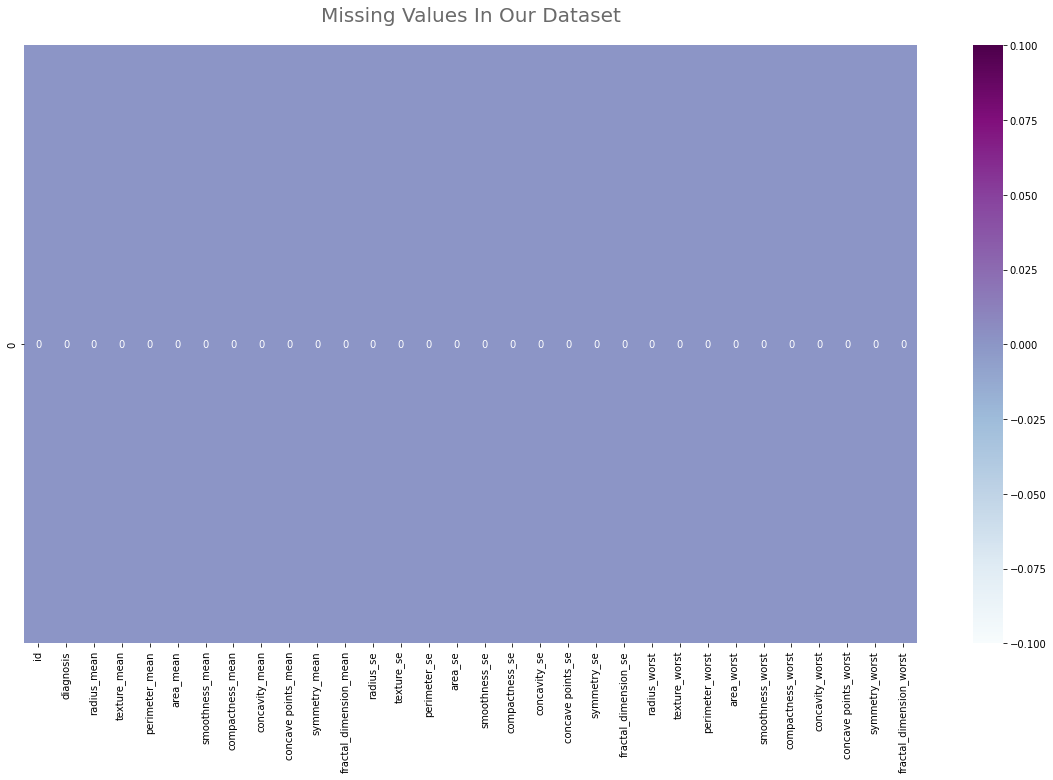

In [5]:
sns.heatmap(pd.DataFrame(df.isna().sum()).T,annot=True,cmap="BuPu",fmt='d')
plt.title('Missing Values In Our Dataset',fontsize=20, color = '#6a6a6a', y=1.03)
plt.show()

In [6]:
print(clr.S+'Count of M or B cells in diagnosis:'+clr.E)
df['diagnosis'].value_counts()

Count of M or B cells in diagnosis:


B    357
M    212
Name: diagnosis, dtype: int64

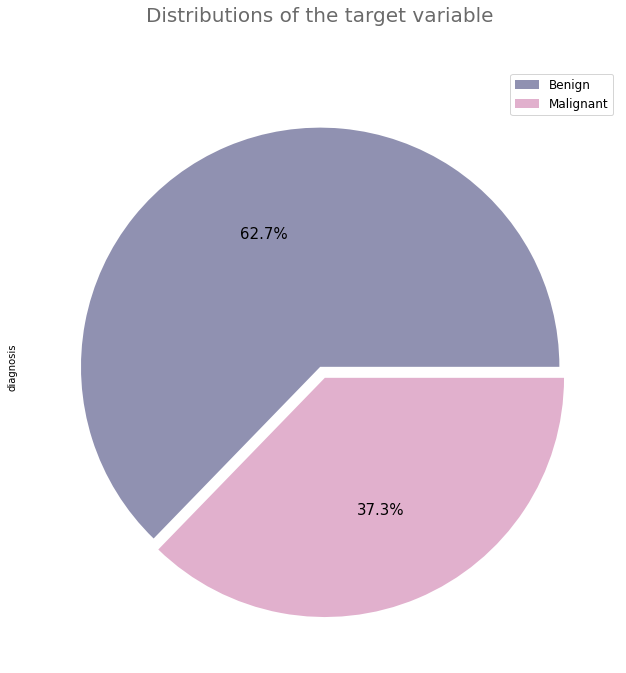

In [7]:
# Plot distribution
df['diagnosis'].value_counts().plot(kind='pie', labels = ['', ''], autopct = '%1.1F%%', colors = ['#9091b1','#e1b0cd'], 
                                    explode = [0,0.05], textprops = {'fontsize':15})
plt.legend(labels=['Benign', 'Malignant'], fontsize=12)
plt.title('Distributions of the target variable\n', fontsize=20, color = '#6a6a6a', y=1.03)
plt.show()

<p style="margin: 0cm 0cm 10pt; line-height: 115%; font-size: 15px; font-family: Calibri, sans-serif; text-align: center;"><span style='font-size: 24px; line-height: 115%; color: #6a6a6a; font-family: "Times New Roman", Times, serif;'>So, we don't have missing values out of 569 samples.
<br>Our dataset has 357 B cells and 212 M cells.<br>Approximately 2/3 of the dataset is B cells.<br> </span></p>

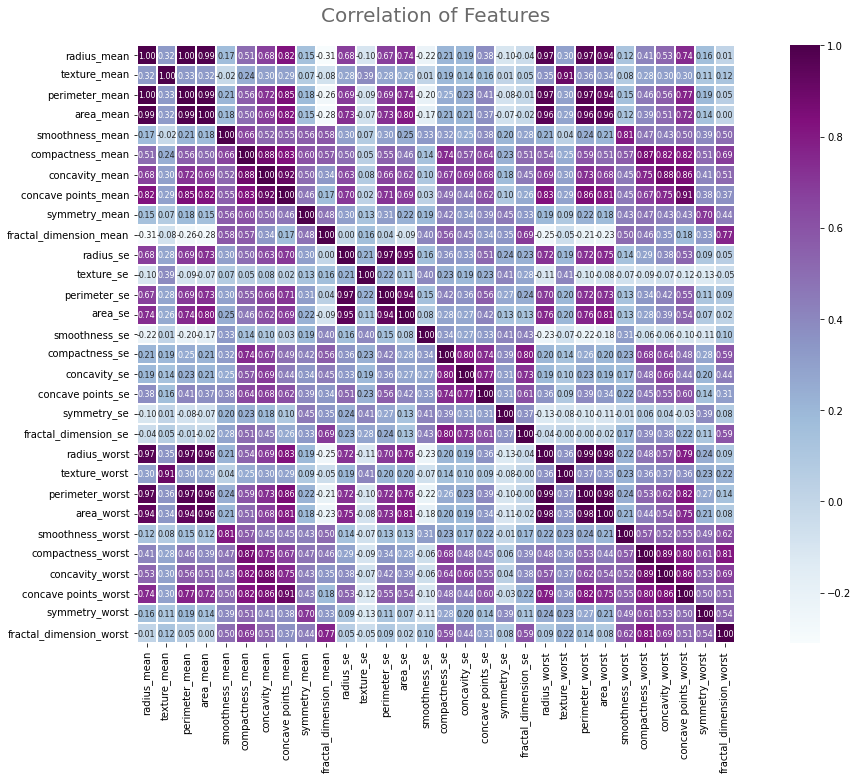

In [8]:
# Plot correlation of features (except 'id', 'diagnosis' columns)
corr = df.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 2, as_cmap = True)
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = "BuPu", linewidths = 0.1, linecolor = 'white')
plt.title('Correlation of Features', fontsize=20, color = '#6a6a6a', y=1.03);

<a id="1.1"></a>
<h1 style="background-color:#d8b2d5;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Label Encoding</h1> 

In [9]:
print(clr.S+'Datatypes of each column in our dataset:'+clr.E)
df.dtypes

Datatypes of each column in our dataset:


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
# Encode the diagnosis values
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values) 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id="1.1"></a>
<h1 style="background-color:#d8b2d5;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Split Dataset and Feature Scalling</h1> 

In [11]:
# Splitting the dataset into independent and dependent datasets
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

In [12]:
# Splittind datasets into training(80%) and testing(20%)
X_train, X_test, Y_train, Y_test = split(X, Y, test_size=0.2, random_state=1212)

In [13]:
# Scalling the data (feature scalling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Print data
X_train

array([[-0.86845208, -1.02520253, -0.84256592, ..., -0.14536982,
         0.57067023,  0.35981963],
       [ 1.93681852,  0.87388123,  1.79945393, ...,  1.24552678,
        -0.17269978, -0.51736168],
       [-0.59348001, -1.10276411, -0.57920829, ..., -0.77112438,
        -0.28909383, -0.07989996],
       ...,
       [-0.2824005 , -0.25898804, -0.32831491, ..., -0.1900453 ,
        -1.08367723, -0.85660618],
       [-0.09353079,  0.06536043, -0.15140291, ..., -0.8691126 ,
        -0.65224328, -0.86450872],
       [-0.68791486, -0.62329247, -0.71269643, ..., -0.7085787 ,
        -1.89533176, -0.62065909]])

<a id="1.1"></a>
<h1 style="background-color:#d8b2d5;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Logistic Regression Model</h1> 

In [14]:
# Build a Logistic Regression Classifier
classifier = LogisticRegression().fit(X_train, Y_train)

# Make used of trained model to make predictions on test data
predictions = classifier.predict(X_test)

<a id="1.1"></a>
<h1 style="background-color:#d8b2d5;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 10px 10px;">Evaluation</h1> 

[[73  3]
 [ 0 38]]


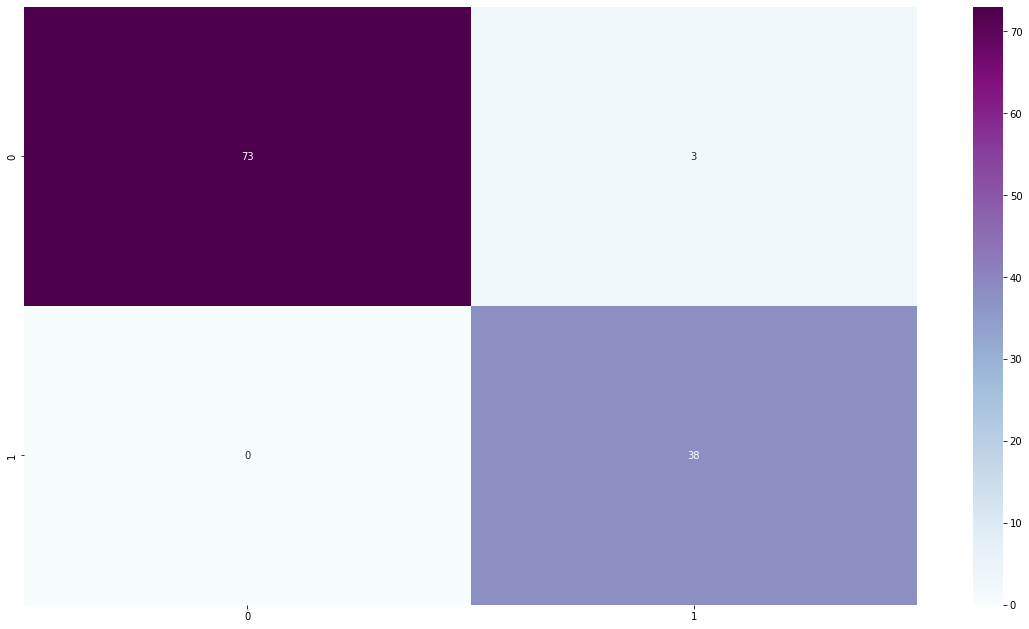

In [15]:
# plot confusion matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)

sns.heatmap(cm, annot=True, cmap='BuPu')
plt.show()

In [16]:
# Get accuracy for model
print(clr.S+'Prediction Accuracy:'+clr.E, accuracy_score(Y_test, predictions))

Prediction Accuracy: 0.9736842105263158


<a id="1.1"></a>
<h1 style="background-color:#d8b2d5;font-family:newtimeroman;font-size:280%;text-align:center;border-radius: 10px 10px;">👍 ❤️ If you find this notebook useful, I would appreciate an upvote! ❤️ 👍</h1> 